<a href="https://colab.research.google.com/github/Mercymerine/Amdari21DayDataChallenge/blob/main/renewable_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data loading**

In [2]:
turbine = pd.read_csv('/content/TexasTurbine.csv')
turbine.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
turbine.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [4]:
turbine.shape

(8760, 6)

**Cleaning the data**

In [5]:
turbine.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [7]:
#Check for missing values
#Fix the timestamp
#Set the timestamp as index
#Check for duplicates

In [6]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [8]:
turbine.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [19]:
turbine['Time stamp']

0        Jan 1, 12:00 am
1        Jan 1, 01:00 am
2        Jan 1, 02:00 am
3        Jan 1, 03:00 am
4        Jan 1, 04:00 am
              ...       
8755    Dec 31, 07:00 pm
8756    Dec 31, 08:00 pm
8757    Dec 31, 09:00 pm
8758    Dec 31, 10:00 pm
8759    Dec 31, 11:00 pm
Name: Time stamp, Length: 8760, dtype: object

In [29]:
turbine['Time stamp'] = pd.to_datetime(turbine['Time stamp'], format="%b %d, %I:%M %p").dt.strftime("%Y-%m-%d %H:%M:%S")
turbine['Time stamp'] = turbine['Time stamp'].str.replace('1900', '2021')

#Convert
turbine['Time stamp'] = pd.to_datetime(turbine['Time stamp'])

In [31]:
turbine.index = turbine['Time stamp']
turbine.drop('Time stamp', axis=1, inplace=True)

In [32]:
turbine.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
Time stamp,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [33]:
#Checking for duplicates
turbine.duplicated().sum()

0

**Feature Engineering**

In [34]:
 #Extract the following information from the date index:day of the week, month, quarter


In [41]:
def extract_features(dataframe):
  '''
  This function extracts features from the date index of a dataframe
'''
  #Copy of the dataframe
  dataframe = dataframe.copy()
  dataframe['quarter'] = dataframe.index.quarter
  dataframe['month'] = dataframe.index.month
  dataframe['week'] =dataframe.index.isocalendar().week.astype(int)
  dataframe['hour'] = dataframe.index.hour

  return dataframe

def map_month_to_season(month):
   if  3 <= month <=5:
    return 'Spring'
   elif 6 <= month <=8:
    return 'Summer'
   elif 9 <= month <=11:
    return 'Fall'
   else:
    return 'Winter'

In [43]:
turbine = extract_features(turbine)
turbine

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour
Time stamp,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21


In [46]:
turbine['season'] = turbine['month'].apply(map_month_to_season)
turbine

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,Winter
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,Winter
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,Winter


In [48]:
#View datatypes
turbine.dtypes

System power generated | (kW)    float64
Wind speed | (m/s)               float64
Wind direction | (deg)             int64
Pressure | (atm)                 float64
Air temperature | ('C)           float64
quarter                            int32
month                              int32
week                               int64
hour                               int32
season                            object
dtype: object

In [50]:
turbine.columns

Index(['System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

In [51]:
turbine.columns = ['power_generated', 'wind_speed',
       'wind_direction', 'pressure', 'air_temperature',
       'quarter', 'month', 'week', 'hour', 'season']

In [52]:
turbine.head()

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter


**EXPLORATORY DATA ANALYSIS**

In [53]:
#Univariate: power generated, wind speed, direction, temperature, pressure and season
#Multivariate

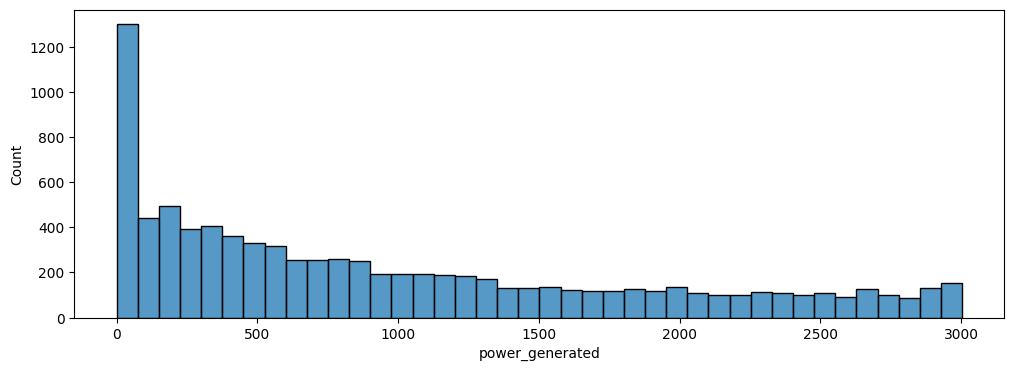

In [54]:
#Visualizing distribution for the power generated

#Specify the plot size
plt.figure(figsize = (12, 4))

#Create a histogram
sns.histplot(turbine['power_generated'], bins = 40)
plt.show()

In [55]:
turbine.power_generated.mean()

964.4679340166095

In [57]:
turbine.power_generated.describe()

count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: power_generated, dtype: float64

In [59]:
#selecting out null power generated rows
turbine[turbine['power_generated']<=0]

#In 822 instances, we get power gen to be 0

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,1,1,1,0,Winter
2021-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,Winter
2021-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,1,1,1,22,Winter
2021-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,1,1,1,23,Winter
2021-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,4,12,52,23,Winter
2021-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,4,12,52,0,Winter
2021-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,4,12,52,1,Winter


In [60]:
turbine[turbine['power_generated']<=0]['season'].value_counts()

season
Fall      284
Winter    239
Summer    191
Spring    108
Name: count, dtype: int64

<ipython-input-62-311a6ce5b245>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y= season_counts, palette = 'viridis')


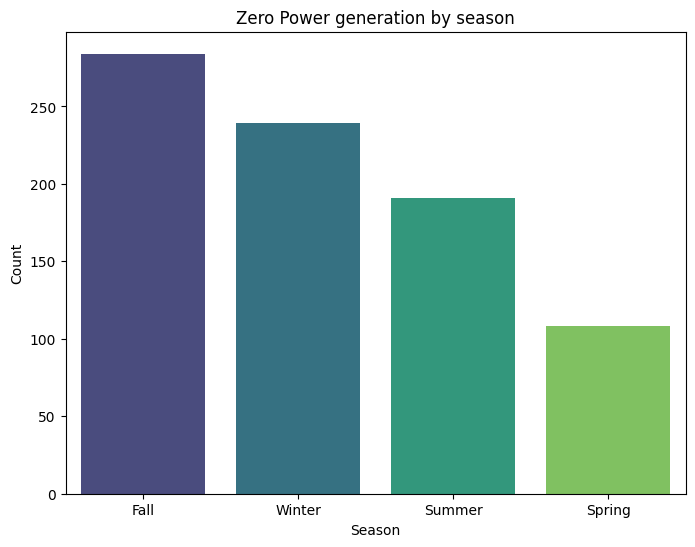

In [62]:
#barplot
season_counts = turbine[turbine['power_generated']<=0]['season'].value_counts()

plt.figure(figsize= (8, 6))
sns.barplot(x=season_counts.index, y= season_counts, palette = 'viridis')

plt.title('Zero Power generation by season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

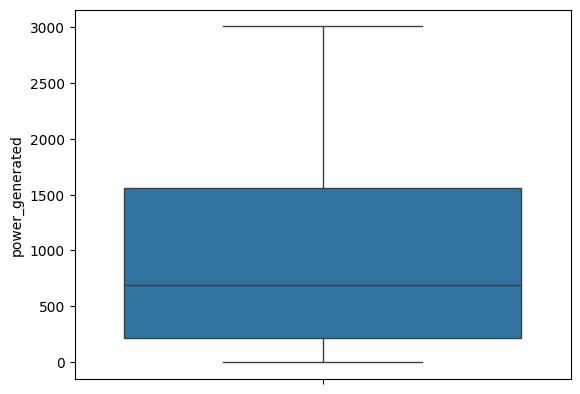

In [64]:
#Power generated
sns.boxplot(turbine['power_generated'])
plt.show()

There is an absence of outliers in the power generated column

In [65]:
turbine.columns

Index(['power_generated', 'wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

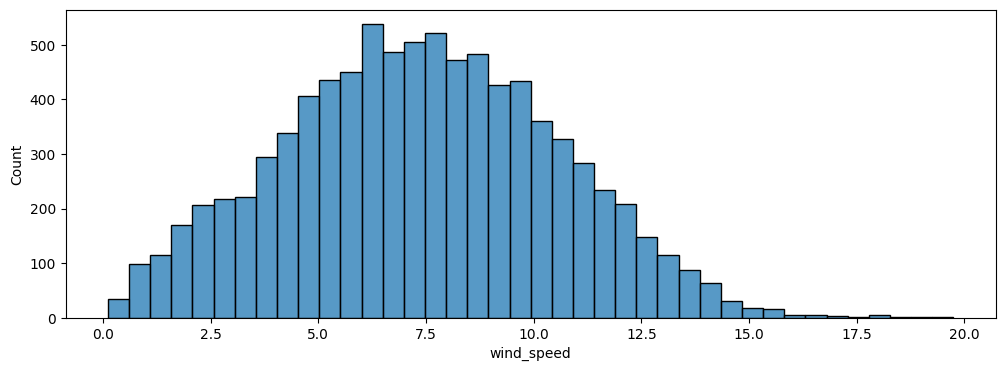

In [66]:
#Checking for the distribution of the windspeed
plt.figure(figsize = (12, 4))
sns.histplot(turbine['wind_speed'], bins=40)
plt.show()

The wind speed is normally distributed

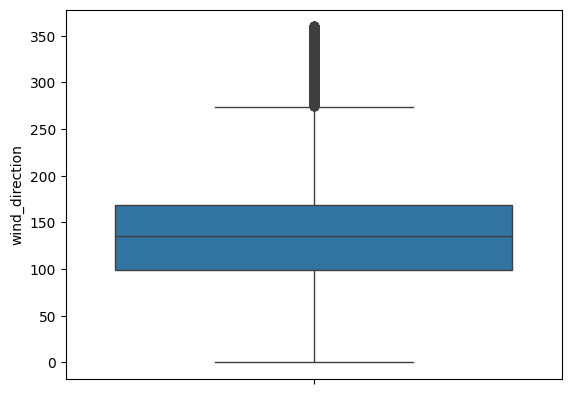

In [67]:
#Wind direction in box plot
sns.boxplot(turbine['wind_direction'])
plt.show()

Severity is not too large
You remove outliers by capping or transforming

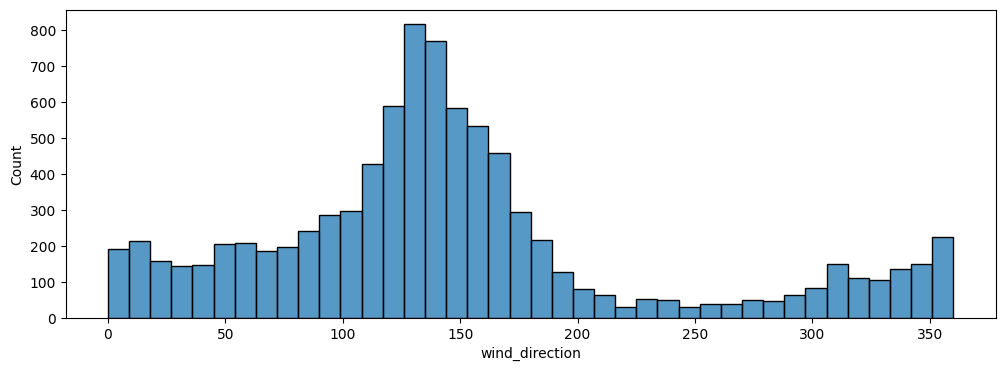

In [68]:
#Checking for the distribution of the winddirection
plt.figure(figsize = (12, 4))
sns.histplot(turbine['wind_direction'], bins=40)
plt.show()

Distribution of wind directin in angles is not strictly normal distribution

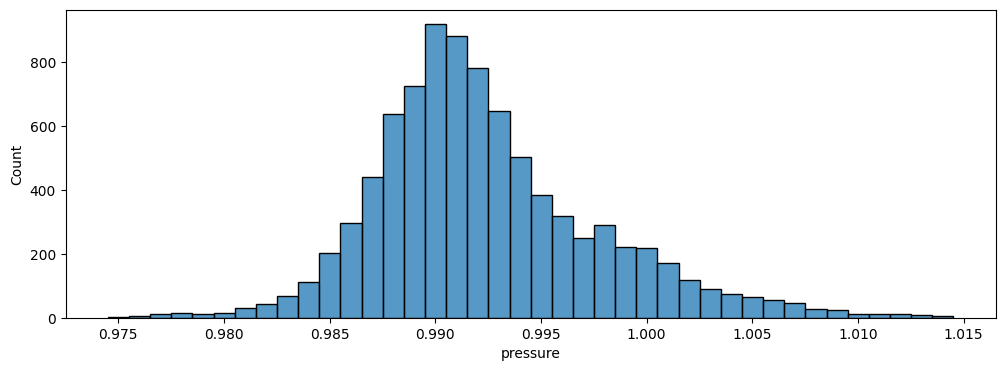

In [69]:
#Checking for the distribution of the pressure values
plt.figure(figsize = (12, 4))
sns.histplot(turbine['pressure'], bins=40)
plt.show()

In [70]:
turbine.columns

Index(['power_generated', 'wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

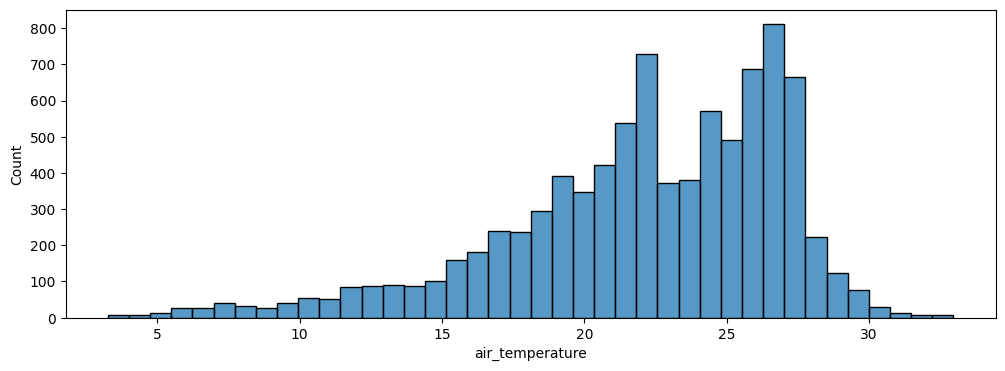

In [71]:
#Checking for the distribution of the temperature
plt.figure(figsize = (12, 4))
sns.histplot(turbine['air_temperature'], bins=40)
plt.show()

Temperature is skewed to the right probably due to the fact that warm days are more than cold days